In [49]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas.io.data as web

In [50]:
style.use('ggplot')

start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

In [51]:
df = web.DataReader('TSLA', 'yahoo', start, end)
print(df.tail(6))

                  Open        High         Low       Close   Volume  \
Date                                                                  
2016-12-22  208.220001  209.990005  206.500000  208.449997  3111100   
2016-12-23  208.000000  213.449997  207.710007  213.339996  4670500   
2016-12-27  214.880005  222.250000  214.419998  219.529999  5915700   
2016-12-28  221.529999  223.800003  217.199997  219.740005  3782500   
2016-12-29  218.559998  219.199997  214.119995  214.679993  4045000   
2016-12-30  216.300003  217.500000  211.679993  213.690002  4642600   

             Adj Close  
Date                    
2016-12-22  208.449997  
2016-12-23  213.339996  
2016-12-27  219.529999  
2016-12-28  219.740005  
2016-12-29  214.679993  
2016-12-30  213.690002  


In [52]:
df.to_csv('tsla.csv')

In [53]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

print(df_ohlc.head())

                 open       high        low      close
Date                                                  
2010-06-29  23.889999  23.889999  15.800000  17.459999
2010-07-09  17.400000  20.639999  17.049999  20.639999
2010-07-19  21.910000  21.910000  20.219999  20.719999
2010-07-29  20.350000  21.950001  19.590000  19.590000
2010-08-08  19.600000  19.600000  17.600000  19.150000


In [54]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
print(df.head())

                 Open   High        Low      Close    Volume  Adj Close
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  18766300  23.889999
2010-06-30  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2010-07-01  25.000000  25.92  20.270000  21.959999   8218800  21.959999
2010-07-02  23.000000  23.10  18.709999  19.200001   5139800  19.200001
2010-07-06  20.000000  20.00  15.830000  16.110001   6866900  16.110001


In [57]:
df_ohlc.reset_index(inplace=True)
print(df_ohlc.head())
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

   level_0  index      Date       open       high        low      close
0        0      0  733952.0  23.889999  23.889999  15.800000  17.459999
1        1      1  733962.0  17.400000  20.639999  17.049999  20.639999
2        2      2  733972.0  21.910000  21.910000  20.219999  20.719999
3        3      3  733982.0  20.350000  21.950001  19.590000  19.590000
4        4      4  733992.0  19.600000  19.600000  17.600000  19.150000


AttributeError: 'float' object has no attribute 'toordinal'

In [58]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()

In [28]:
print(df)

                  Open        High         Low       Close    Volume  \
Date                                                                   
2010-06-29   19.000000   25.000000   17.540001   23.889999  18766300   
2010-06-30   25.790001   30.420000   23.299999   23.830000  17187100   
2010-07-01   25.000000   25.920000   20.270000   21.959999   8218800   
2010-07-02   23.000000   23.100000   18.709999   19.200001   5139800   
2010-07-06   20.000000   20.000000   15.830000   16.110001   6866900   
2010-07-07   16.400000   16.629999   14.980000   15.800000   6921700   
2010-07-08   16.139999   17.520000   15.570000   17.459999   7711400   
2010-07-09   17.580000   17.900000   16.549999   17.400000   4050600   
2010-07-12   17.950001   18.070000   17.000000   17.049999   2202500   
2010-07-13   17.389999   18.639999   16.900000   18.139999   2680100   
2010-07-14   17.940001   20.150000   17.760000   19.840000   4195200   
2010-07-15   19.940001   21.500000   19.000000   19.889999   373

In [29]:
# df.dropna(inplace=True)

In [34]:
ax1 = plt.subplot2grid((6,1),(0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1, sharex=ax1)

In [35]:
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

<Container object of 1640 artists>

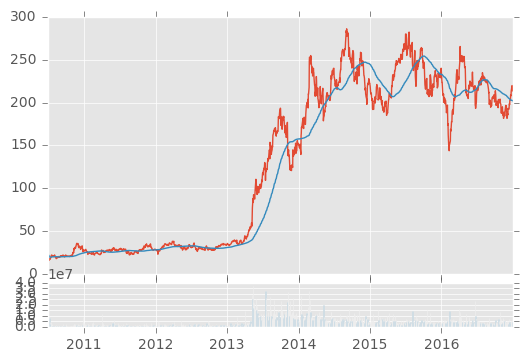

In [36]:
plt.show()